In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=198b8f835424a8854d9cfc15267934ee


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | fort-shevchenko
Processing Record 3 of Set 1 | mersing
Processing Record 4 of Set 1 | kodigenahalli
Processing Record 5 of Set 1 | cordele
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | lindenberg
Processing Record 12 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 13 of Set 1 | kemin
Processing Record 14 of Set 1 | vrangel
Processing Record 15 of Set 1 | aktau
Processing Record 16 of Set 1 | rivadavia
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,54.00,63,0,17.00,AR,2021-05-31 08:36:26
1,Fort-Shevchenko,44.5086,50.2630,71.10,73,3,12.73,KZ,2021-05-31 08:36:49
2,Mersing,2.4312,103.8405,76.91,100,40,3.44,MY,2021-05-31 08:36:50
3,Kodigenahalli,13.7200,77.3903,90.59,40,62,9.64,IN,2021-05-31 08:36:50
4,Cordele,31.9635,-83.7824,66.72,72,1,4.61,US,2021-05-31 08:36:51
5,Hilo,19.7297,-155.0900,74.93,88,90,5.75,US,2021-05-31 08:36:41
6,Geraldton,-28.7667,114.6000,66.13,68,40,16.84,AU,2021-05-31 08:27:03
7,Vardo,70.3705,31.1107,44.58,76,75,20.71,NO,2021-05-31 08:27:31
8,Mataura,-46.1927,168.8643,49.48,97,100,3.80,NZ,2021-05-31 08:36:51
9,Anadyr,64.7500,177.4833,54.10,43,0,3.33,RU,2021-05-31 08:36:52


In [17]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-05-31 08:36:26,-38.0023,-57.5575,54.00,63,0,17.00
1,Fort-Shevchenko,KZ,2021-05-31 08:36:49,44.5086,50.2630,71.10,73,3,12.73
2,Mersing,MY,2021-05-31 08:36:50,2.4312,103.8405,76.91,100,40,3.44
3,Kodigenahalli,IN,2021-05-31 08:36:50,13.7200,77.3903,90.59,40,62,9.64
4,Cordele,US,2021-05-31 08:36:51,31.9635,-83.7824,66.72,72,1,4.61
5,Hilo,US,2021-05-31 08:36:41,19.7297,-155.0900,74.93,88,90,5.75
6,Geraldton,AU,2021-05-31 08:27:03,-28.7667,114.6000,66.13,68,40,16.84
7,Vardo,NO,2021-05-31 08:27:31,70.3705,31.1107,44.58,76,75,20.71
8,Mataura,NZ,2021-05-31 08:36:51,-46.1927,168.8643,49.48,97,100,3.80
9,Anadyr,RU,2021-05-31 08:36:52,64.7500,177.4833,54.10,43,0,3.33


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622451692.55387

In [22]:
today = time.strftime('%x')
today

'05/31/21'

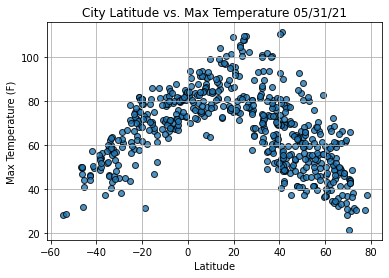

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

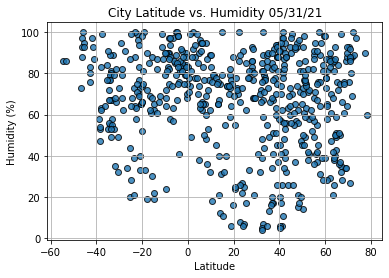

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

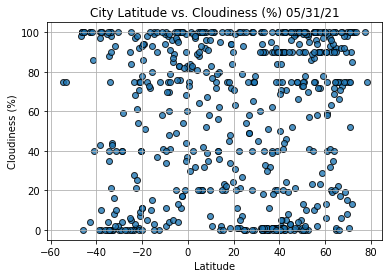

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

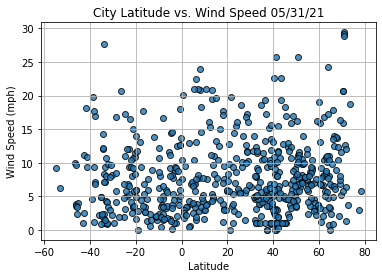

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Fort-Shevchenko,KZ,2021-05-31 08:36:49,44.5086,50.2630,71.10,73,3,12.73
2,Mersing,MY,2021-05-31 08:36:50,2.4312,103.8405,76.91,100,40,3.44
3,Kodigenahalli,IN,2021-05-31 08:36:50,13.7200,77.3903,90.59,40,62,9.64
4,Cordele,US,2021-05-31 08:36:51,31.9635,-83.7824,66.72,72,1,4.61
5,Hilo,US,2021-05-31 08:36:41,19.7297,-155.0900,74.93,88,90,5.75
...,...,...,...,...,...,...,...,...,...
570,Matamoros,MX,2021-05-31 08:41:09,25.5333,-103.2500,77.11,62,54,5.44
571,Sur,OM,2021-05-31 08:41:10,22.5667,59.5289,104.40,26,5,3.87
572,Nizhniy Tsasuchey,RU,2021-05-31 08:41:11,50.5167,115.1333,56.17,45,100,16.20
573,Adrar,MR,2021-05-31 08:32:16,20.5022,-10.0711,91.80,25,63,7.23


In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Fort-Shevchenko,KZ,2021-05-31 08:36:49,44.5086,50.2630,71.10,73,3,12.73
2,Mersing,MY,2021-05-31 08:36:50,2.4312,103.8405,76.91,100,40,3.44
3,Kodigenahalli,IN,2021-05-31 08:36:50,13.7200,77.3903,90.59,40,62,9.64
4,Cordele,US,2021-05-31 08:36:51,31.9635,-83.7824,66.72,72,1,4.61
5,Hilo,US,2021-05-31 08:36:41,19.7297,-155.0900,74.93,88,90,5.75


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

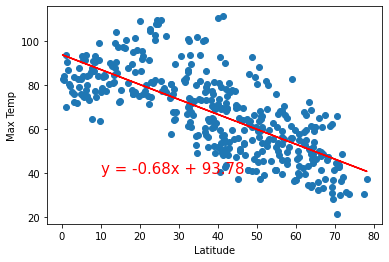

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

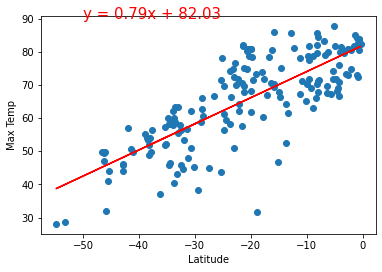

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

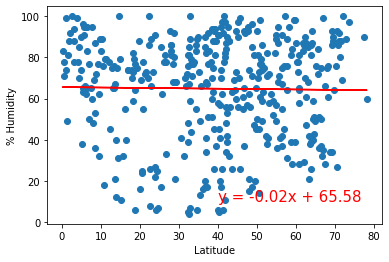

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

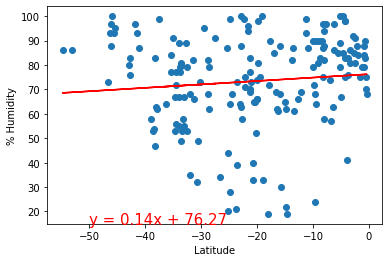

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

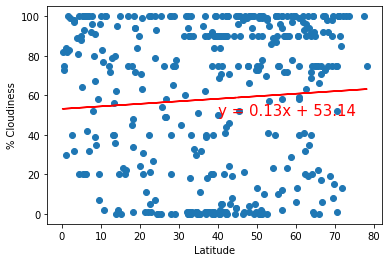

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

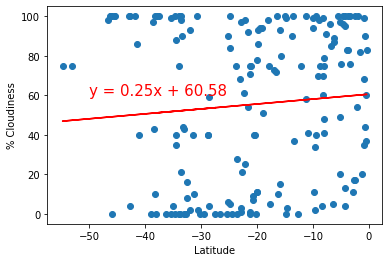

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

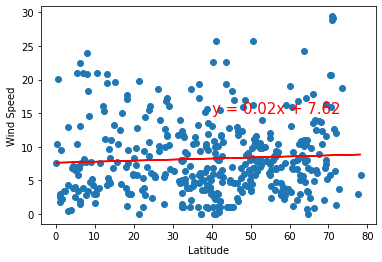

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

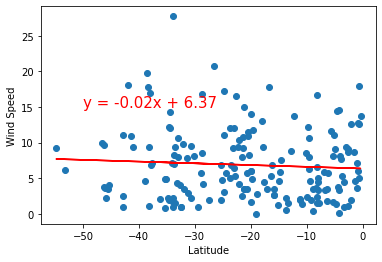

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))